In [43]:
from aesthetics import *

%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import scipy as sc
import os as os
import re as re

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
data = np.genfromtxt('/home/dslochower/data/projects/nonequilibrium/md-data/butane-rotational-diffusion/md-data/Langevin-dynamics-10fs-recording/cccc.dat')

In [7]:
frequency_to_previous = []
frequency_to_stay     = []
frequency_to_next     = []
bin_numbers           = range(1, len(rng)+1) # Digitized starts at 1
for this_bin in bin_numbers:
    when_in_this_bin = np.where(digitized == this_bin)[0]
    next_place = np.array([digitized[i+1] for i in when_in_this_bin if i < len(digitized) - 1])
    print('Times in bin {} = {}'.format(this_bin, len(next_place)))
    if this_bin == min(bin_numbers):
        this_previous = len(np.where(next_place == max(bin_numbers))[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
        frequency_to_next.append(this_next) 
    elif this_bin == max(bin_numbers):
        this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == min(bin_numbers))[0]) / len(next_place)
        frequency_to_next.append(this_next)               

    else:
        this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)thin
        frequency_to_next.append(this_next)


Times in bin 1 = 41040
Times in bin 2 = 41466
Times in bin 3 = 41164
Times in bin 4 = 41061
Times in bin 5 = 42692
Times in bin 6 = 41900
Times in bin 7 = 42348
Times in bin 8 = 42518
Times in bin 9 = 42315
Times in bin 10 = 40805
Times in bin 11 = 41233
Times in bin 12 = 41457


## Scan bin sizes

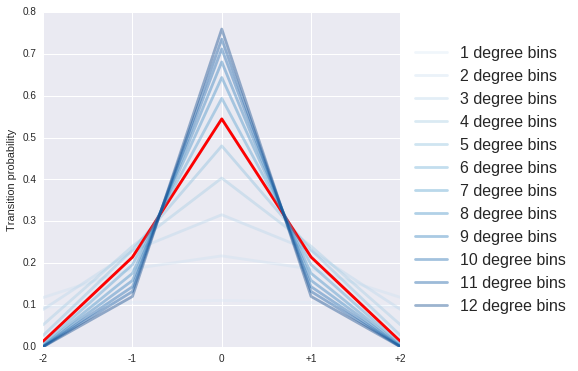

In [6]:
data = np.genfromtxt('/home/dslochower/data/projects/nonequilibrium/md-data/butane-rotational-diffusion/md-data/Langevin-dynamics-10fs-recording/cccc.dat')

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,6))
import seaborn as sns
sns.set_context("poster")
clr = sns.color_palette("Blues", 13)

for b in range(1, 13, 1):

    rng = np.arange(-180, 180, b)
    digitized = np.digitize(data[:, 1], bins = rng)

    frequency_to_previous_previous = []
    frequency_to_previous = []
    frequency_to_stay     = []
    frequency_to_next     = []
    frequency_to_next_next = []

    bin_numbers           = range(1, len(rng)+1) # Digitized starts at 1
    for this_bin in bin_numbers:
        when_in_this_bin = np.where(digitized == this_bin)[0]
        next_place = np.array([digitized[i+1] for i in when_in_this_bin if i < len(digitized) - 1])
        # print('Times in bin {} = {}'.format(this_bin, len(next_place)))
        if this_bin == min(bin_numbers):
            this_previous = len(np.where(next_place == max(bin_numbers))[0]) / len(next_place)
            frequency_to_previous.append(this_previous)
            this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
            frequency_to_stay.append(this_stay)
            this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
            frequency_to_next.append(this_next)
            this_next_next = len(np.where(next_place == this_bin + 2)[0]) / len(next_place)
            frequency_to_next_next.append(this_next_next)
        elif this_bin == max(bin_numbers):
            this_previous_previous = len(np.where(next_place == this_bin - 2)[0]) / len(next_place)
            frequency_to_previous_previous.append(this_previous_previous)
            this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
            frequency_to_previous.append(this_previous)
            this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
            frequency_to_stay.append(this_stay)
            this_next = len(np.where(next_place == min(bin_numbers))[0]) / len(next_place)
            frequency_to_next.append(this_next)               

        else:
            this_previous_previous = len(np.where(next_place == this_bin - 2)[0]) / len(next_place)
            frequency_to_previous_previous.append(this_previous_previous)
            this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
            frequency_to_previous.append(this_previous)
            this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
            frequency_to_stay.append(this_stay)
            this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
            frequency_to_next.append(this_next)
            this_next_next = len(np.where(next_place == this_bin + 2)[0]) / len(next_place)
            frequency_to_next_next.append(this_next_next)


    from scipy import stats
    means = np.mean(frequency_to_previous_previous), np.mean(frequency_to_previous), np.mean(frequency_to_stay), np.mean(frequency_to_next), np.mean(frequency_to_next_next)
    sems  = stats.sem(frequency_to_previous_previous), stats.sem(frequency_to_previous), stats.sem(frequency_to_stay), stats.sem(frequency_to_next), stats.sem(frequency_to_next_next)
    
    index = np.arange(5)
    
    ax.plot(index, means, alpha = 0.4, c=clr[b],  label='{} degree bins'.format(b))
    if b == 6:
        ax.plot(index, means,  c='r')
        
    
# adjust_spines(ax, ['left', 'bottom'])
ax.set_xticks(index)
ax.set_xticklabels(['-2', '-1', '0', '+1', '+2'])
ax.set_ylabel('Transition probability')
# ax.set_title('Transition probabilities for 120, 3 degree bins in 10 fs intervals', y=1.05)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()        

In [21]:
data = np.genfromtxt('/home/dslochower/data/projects/nonequilibrium/md-data/butane-rotational-diffusion/md-data/Langevin-dynamics-10fs-recording/cccc.dat')
all_means = []

for b in range(1, 30, 1):

    rng = np.arange(-180, 180, b)
    print(np.diff(rng))
    digitized = np.digitize(data[:, 1], bins = rng)

    frequency_to_previous_previous = []
    frequency_to_previous = []
    frequency_to_stay     = []
    frequency_to_next     = []
    frequency_to_next_next = []

    bin_numbers = range(1, len(rng)+1) # Digitized starts at 1
    for this_bin in bin_numbers:
        when_in_this_bin = np.where(digitized == this_bin)[0]
        next_place = np.array([digitized[i+1] for i in when_in_this_bin if i < len(digitized) - 1])
        # print('Times in bin {} = {}'.format(this_bin, len(next_place)))
        if this_bin == min(bin_numbers):
            this_previous = len(np.where(next_place == max(bin_numbers))[0]) / len(next_place)
            frequency_to_previous.append(this_previous)
            this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
            frequency_to_stay.append(this_stay)
            this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
            frequency_to_next.append(this_next)
            this_next_next = len(np.where(next_place == this_bin + 2)[0]) / len(next_place)
            frequency_to_next_next.append(this_next_next)
        elif this_bin == max(bin_numbers):
            this_previous_previous = len(np.where(next_place == this_bin - 2)[0]) / len(next_place)
            frequency_to_previous_previous.append(this_previous_previous)
            this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
            frequency_to_previous.append(this_previous)
            this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
            frequency_to_stay.append(this_stay)
            this_next = len(np.where(next_place == min(bin_numbers))[0]) / len(next_place)
            frequency_to_next.append(this_next)               

        else:
            this_previous_previous = len(np.where(next_place == this_bin - 2)[0]) / len(next_place)
            frequency_to_previous_previous.append(this_previous_previous)
            this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
            frequency_to_previous.append(this_previous)
            this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
            frequency_to_stay.append(this_stay)
            this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
            frequency_to_next.append(this_next)
            this_next_next = len(np.where(next_place == this_bin + 2)[0]) / len(next_place)
            frequency_to_next_next.append(this_next_next)


    from scipy import stats
    means = np.mean(frequency_to_previous_previous), np.mean(frequency_to_previous), np.mean(frequency_to_stay), np.mean(frequency_to_next), np.mean(frequency_to_next_next)
    sems  = stats.sem(frequency_to_previous_previous), stats.sem(frequency_to_previous), stats.sem(frequency_to_stay), stats.sem(frequency_to_next), stats.sem(frequency_to_next_next)
        
    all_means.append(means[2])


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

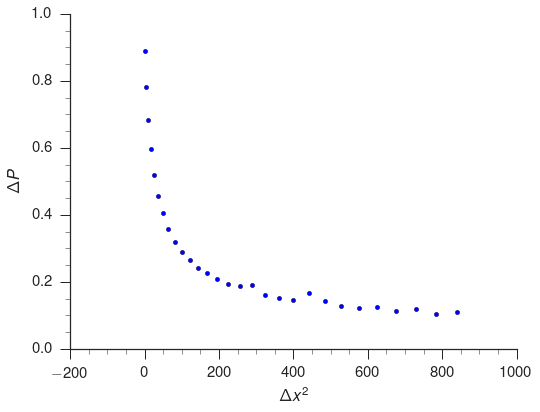

In [48]:
fig = plt.figure(figsize=(8,6))
plt.scatter([i**2 for i in range(1, 30)], [(1 - i) for i in all_means])
plt.ylabel('$\mathsf{\Delta} P$')
plt.xlabel('$\mathsf{\Delta} x^2$')
pretty_plot(fig)

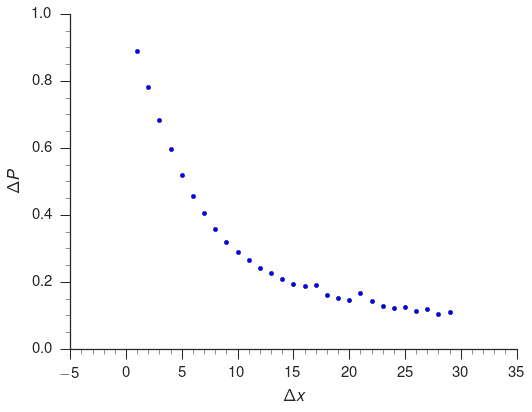

In [49]:
fig = plt.figure(figsize=(8,6))
plt.scatter([i for i in range(1, 30)], [(1 - i) for i in all_means])
plt.ylabel('$\mathsf{\Delta} P$')
plt.xlabel('$\mathsf{\Delta} x$')
pretty_plot(fig)